# Visualizing the OLS cost function, L1, L2 constraints

Starter code for the Q3

#### Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline
plt.style.use('seaborn-white')

#### Creating the data set

In [2]:
#Creating the dataset (as previously)
x = np.linspace(0,1,40)
noise = 1*np.random.uniform(  size = 40)
y = np.sin(x * 1.5 * np.pi ) 
y_noise = (y + noise).reshape(-1,1)

#Subtracting the mean so that the y's are centered
y_noise = y_noise - y_noise.mean()
X = np.vstack((2*x,x**2)).T

#Nornalizing the design matrix to facilitate visualization
X = X / np.linalg.norm(X,axis = 0)
#print(X.shape,y_noise.shape)

#### Helper functions

In [3]:
''' Complete the cell '''
#### HINT: Write the closed form function for OLS, Ridge and coordinate descent function for Lasso 
#### Each function must depend on the variable lambda

def costfunction(X, y, W):
    '''Cost function for linear regression'''
    #Initialization of useful values 
    m = np.size(y)
    
    #Vectorized implementation
    h = X @ W
    J = float((1./(2*m)) * (h - y).T @ (h - y));    
    return J
###########################################################################################
def W_l2(X_mat, Y_vec, lamda):
    '''Closed-form solution of Ridge regression'''
    m, n = X_mat.shape
    I = np.eye((n))
    w =  np.linalg.inv(X_mat.T @ X_mat + lamda * I) @ X_mat.T @ Y_vec
    return w
def cost_l2(X, y, W, lamda = 10):
    '''Cost function for ridge regression (regularized L2)'''
    #Initialization
    m = len(y) 
    J = 0
    
    #Vectorized implementation
    h = X @ W
    J_reg = (lamda / (2*m)) * np.sum(np.square(W))
    J = float((1./(2*m)) * (h - y).T @ (h - y)) + J_reg;
    return J
################################################################################################
def cost_l1(X, y, W, lamda = 10):
    '''Cost function for ridge regression (regularized L2)'''
    #Initialization
    m = len(y) 
    J = 0
    
    #Vectorized implementation
    h = X @ W
    J_reg = (lamda / (2*m)) * np.sum(np.abs(W))
    J = float((1./(2*m)) * (h - y).T @ (h - y)) + J_reg;
    return J


#### Computing the Ridge regularization solutions as a function of $\lambda$

In [4]:
''' Complete the cell '''
#### HINT: For the lambda range given below, call the ridge regression function
#### and store optimal w for each lambda

lambda_range = np.logspace(0,4,num = 100)/1000

w_ridge =np.empty((lambda_range.shape[0],2,1))

for i in range(lambda_range.shape[0]):
    w_ridge[i,:]=W_l2(X, y_noise, lambda_range[i])
    
w_ridge=np.reshape(w_ridge,(100,2))

#### Computing the Lasso regularization solutions as a function of $\lambda$

In [5]:
''' Complete the cell '''
#### HINT: For the lambda range given below, call the lasso function
#### and store optimal w for each lambda. [You can alternatively use
#### SKLearn for this excercise to compute Lasso]
from sklearn import linear_model
lambda_range = np.logspace(0,2,num = 100)/1000
w_lasso =np.empty((lambda_range.shape[0],2))
for i in range(lambda_range.shape[0]):
    clf = linear_model.Lasso(alpha=lambda_range[i])
    clf.fit(X, y_noise)
    w_lasso[i]=clf.coef_
    
print(w_lasso.shape)


(100, 2)


#### Plotting the results

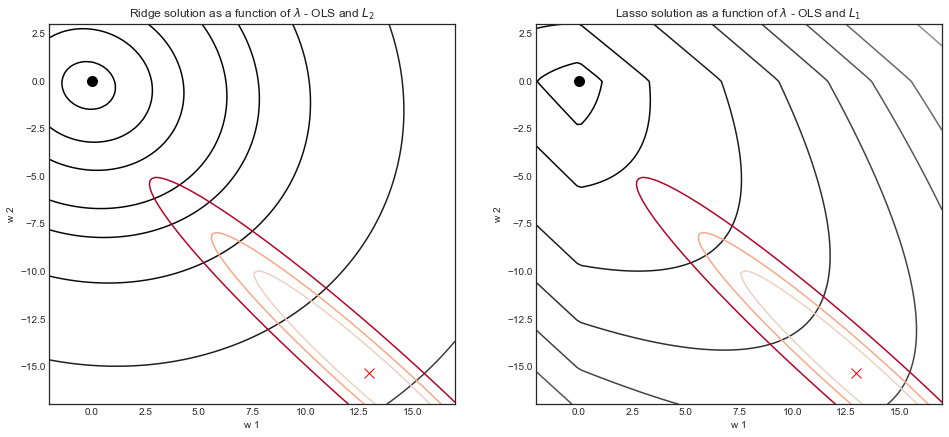

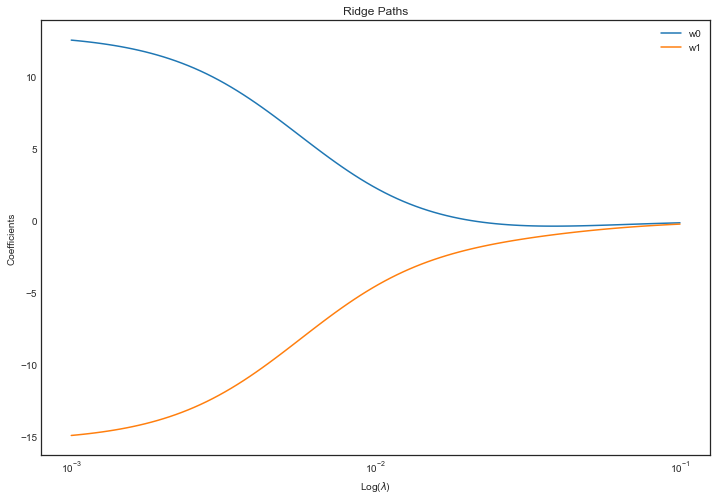

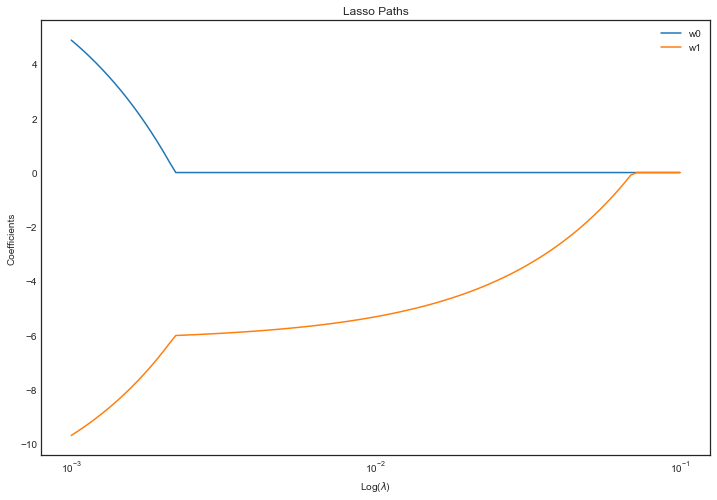

In [6]:
''' Complete the cell '''
l=10
#Setup of meshgrid of w values
xx, yy = np.meshgrid(np.linspace(-2,17,100),np.linspace(-17,3,100))

#Computing the cost function for each w combination
zz_l2 = np.array(  [cost_l2(X, y_noise.reshape(-1,1), np.array([xi,yi]).reshape(-1,1),l )for xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] ) #L2 function

zz_l1 = np.array(  [cost_l1(X, y_noise.reshape(-1,1), np.array([xi,yi]).reshape(-1,1),l )for xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] ) #L1 function

zz_ls = np.array(  [costfunction(X, y_noise.reshape(-1,1),np.array([t0,t1]).reshape(-1,1)) 
                     for t0, t1 in zip(np.ravel(xx), np.ravel(yy)) ] ) #least square cost function

#Reshaping the cost values    
Z_l2 = zz_l2.reshape(xx.shape)
Z_ls = zz_ls.reshape(xx.shape)
Z_l1 = zz_l1.reshape(xx.shape)

#Defining the global min of each function
min_ls = np.linalg.inv(X.T @ X) @X.T @ y_noise
min_l2 = np.array([0.,0.])
min_l1 = np.array([0.,0.])

#Plotting the contours - L2 
fig = plt.figure(figsize = (16,7))
ax = fig.add_subplot(1, 2, 1)
ax.contour(xx, yy, Z_l2, levels = [.5,1.5,3,6,9,15,30,60,100,150,250],  cmap = 'gist_gray')
ax.contour(xx, yy, Z_ls, levels = [.01,.06,.09,.11,.15], cmap = 'coolwarm')
ax.set_xlabel('w 1')
ax.set_ylabel('w 2')
ax.set_title('Ridge solution as a function of $\\lambda$ - OLS and $L_2$ ')

#Plotting the minimum - L2 
ax.plot(min_ls[0],min_ls[1], marker = 'x', color = 'red', markersize = 10)
ax.plot(0,0, marker = 'o', color = 'black', markersize = 10)

###############################################
#''' FILL THIS CODE '''
#Plotting the path of L2 regularized minimum
#### HINT: plot w_0 & w_1 list corresponding to each value of lambda
## Your code below ##


#Plot results
_,n = w_ridge.shape
plt.figure(figsize = (12,8))

for i in range(n):
    plt.plot(lambda_range, w_ridge[:,i], label = 'w'+str(i))
plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('Coefficients')
plt.title('Ridge Paths')
plt.legend()
plt.axis('tight')


#Plotting the contours - L1 
ax = fig.add_subplot(1, 2, 2)
ax.contour(xx, yy, Z_l1, levels = [.5,1,2,3,4,5,6,8,10,12,14],  cmap = 'gist_gray')
ax.contour(xx, yy, Z_ls, levels = [.01,.06,.09,.11,.15], cmap = 'coolwarm')
ax.set_xlabel('w 1')
ax.set_ylabel('w 2')
ax.set_title('Lasso solution as a function of $\\lambda$ - OLS and $L_1$ ')

#Plotting the minimum - L1
ax.plot(min_ls[0],min_ls[1], marker = 'x', color = 'red', markersize = 10)
ax.plot(0,0, marker = 'o', color = 'black', markersize = 10)

###############################################
# ''' FILL THIS CODE '''
# #Plotting the path of L1 regularized minimum
# #### HINT: plot w_0 & w_1 list corresponding to each value of lambda
# ## Your code below ##

#Plot results
_,n = w_lasso.shape
plt.figure(figsize = (12,8))

for i in range(n):
    plt.plot(lambda_range, w_lasso[:,i], label = 'w'+str(i))

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('Coefficients')
plt.title('Lasso Paths')
plt.legend()
plt.axis('tight')


plt.show()
